<a href="https://colab.research.google.com/github/yashsarda18/TASK2/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install paho-mqtt in colab so that it can communicate with mqtt broker

In [43]:
!pip install paho-mqtt

In [44]:
import paho.mqtt.client as mqtt


# Getting hands on with the dataset (basic preprocessing)

In [45]:
import pandas as pd


In [46]:
data = pd.read_csv("/content/test_dataset_all (1) (1).csv")

In [47]:
data.head()

,device,t,w,h,p1,p25,p10
0,DeviceA,"21/03/19,09:01:46",2,SE,30,48,62
1,DeviceA,"21/03/19,09:08:28",3,S,32,50,67
2,DeviceA,"21/03/19,09:15:09",1,W,31,48,64
3,DeviceA,"21/03/19,09:21:51",4,NW,29,49,62
4,DeviceA,"21/03/19,09:28:32",9,S,30,47,61


In [48]:
data.shape

(12079, 7)

In [49]:
data.describe()

,w,p1,p25,p10
count,12079.000000,12079.000000,12079.000000,12079.000000
mean,2.696084,155.379502,168.438364,177.403759
std,3.227753,871.699514,870.278664,869.327281
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,14.000000,18.000000,22.000000
50%,2.000000,23.000000,32.000000,42.000000
75%,3.000000,34.000000,50.000000,65.000000
max,33.000000,6434.000000,6434.000000,6434.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   device  12079 non-null  object
 1   t       12066 non-null  object
 2   w       12079 non-null  int64 
 3   h       12079 non-null  object
 4   p1      12079 non-null  int64 
 5   p25     12079 non-null  int64 
 6   p10     12079 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 660.7+ KB


As there are only 13 rows where value of timestamp is missing , we can remove these rows

In [51]:
# Removing 13 rows where the value of time stamp is missing
data.dropna(subset=["t"], inplace = True)

In [52]:
data.info()
# Removed 13 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12066 entries, 0 to 12078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   device  12066 non-null  object
 1   t       12066 non-null  object
 2   w       12066 non-null  int64 
 3   h       12066 non-null  object
 4   p1      12066 non-null  int64 
 5   p25     12066 non-null  int64 
 6   p10     12066 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 754.1+ KB


In [53]:
data.drop(columns=["device"], inplace = True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12066 entries, 0 to 12078
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   t       12066 non-null  object
 1   w       12066 non-null  int64 
 2   h       12066 non-null  object
 3   p1      12066 non-null  int64 
 4   p25     12066 non-null  int64 
 5   p10     12066 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 659.9+ KB


In [55]:
from datetime import datetime

In [56]:
data['t'] = pd.to_datetime(data['t'], format='%y/%m/%d,%H:%M:%S')
data['t'] = data['t'].astype(int) // 10**9  # Convert nanoseconds to seconds

In [57]:
data['t'][:5]

0    1616144506
1    1616144908
2    1616145309
3    1616145711
4    1616146112
Name: t, dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12066 entries, 0 to 12078
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   t       12066 non-null  int64 
 1   w       12066 non-null  int64 
 2   h       12066 non-null  object
 3   p1      12066 non-null  int64 
 4   p25     12066 non-null  int64 
 5   p10     12066 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 659.9+ KB


Timestamp is converted to int for mqtt to accept

Now lets convert wind direction to integer type

In [59]:
# Create a mapping dictionary for wind directions
wind_direction_mapping = {
    'N': 1,
    'NE': 2,
    'E': 3,
    'SE': 4,
    'S': 5,
    'SW': 6,
    'W': 7,
    'NW': 8
}

data['h'] = data['h'].map(wind_direction_mapping)

# This code will map the wind directions to integers based on the provided mapping.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12066 entries, 0 to 12078
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   t       12066 non-null  int64
 1   w       12066 non-null  int64
 2   h       12066 non-null  int64
 3   p1      12066 non-null  int64
 4   p25     12066 non-null  int64
 5   p10     12066 non-null  int64
dtypes: int64(6)
memory usage: 659.9 KB


In [61]:
data.head(10)

,t,w,h,p1,p25,p10
0,1616144506,2,4,30,48,62
1,1616144908,3,5,32,50,67
2,1616145309,1,7,31,48,64
3,1616145711,4,8,29,49,62
4,1616146112,9,5,30,47,61
5,1616146514,9,2,30,46,62
6,1616146916,4,7,26,41,54
7,1616147317,4,2,36,56,54
8,1616147719,2,8,31,49,60
9,1616148120,2,7,30,47,58


The data is ready to be transmitted to mqtt cloud

In [62]:
import csv
import time

In [63]:
delay_seconds = 1

In [64]:
broker_address = "3099c0fa4d8740e5a3f57e0d13cd6f54.s1.eu.hivemq.cloud"
port = 8883
username = "hivemq.webclient.1693569459655"
password = "6P,y$1zaIc0YRnwE5:D@"

In [65]:
# Function to publish MQTT packets
def publish_batch_mqtt(batch, topic):
    client = mqtt.Client()
    client.connect(broker_address, port)
    for _, row in batch.iterrows():
        payload = row.to_dict()  # Use the DataFrame row data as the payload
        client.publish(topic, str(payload))

    client.disconnect()

In [66]:
# Create an MQTT client instance
client = mqtt.Client()


In [67]:
# Connect to the MQTT broker
client.username_pw_set(username, password)
client.connect(broker_address, port)

0

In [68]:
topic = "pollution_data/DeviceA"

In [69]:
delay_seconds = 1

In [70]:
batch_size = 100

In [71]:
# Use ThreadPoolExecutor to parallelize data transmission in batches
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor() as executor:
    for i in range(0, len(data), batch_size):
        batch = data.iloc[i:i+batch_size]  # Get a batch of rows
        # Submit a new task to publish MQTT packets concurrently for the batch
        executor.submit(publish_batch_mqtt, batch, topic)

        # Add a delay between batch tasks to simulate stacked data
        time.sleep(delay_seconds)

# Close the MQTT connection
client.disconnect()


0

In [72]:
# Callback function when a message is received
def on_message(client, userdata, message):
    print(f"Received message on topic '{message.topic}': {message.payload.decode()}")

# Create an MQTT client instance
client = mqtt.Client()

# Set the message callback function
client.on_message = on_message

# Connect to the MQTT broker
client.connect(broker_address, port)

# Subscribe to the MQTT topic
client.subscribe(topic)

# Start the MQTT loop to listen for incoming messages
client.loop_start()

# You can now receive and print incoming messages
# Make sure to run this cell and wait for messages to arrive

# To stop the MQTT client and unsubscribe, use:
client.loop_stop()
client.unsubscribe(topic)
client.disconnect()


4

In [73]:
import tensorflow as tf
device_list = tf.test.gpu_device_name()

In [74]:
device_list

'/device:GPU:0'

In [75]:
if device_list != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_list))

Found GPU at: /device:GPU:0


# SAVING INTO MONGODB DATABASE

In [76]:
!pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 8.4 MB/s eta 0:00:00


In [77]:
import paho.mqtt.client as mqtt
import pymongo

# MongoDB Configuration
mongo_client = pymongo.MongoClient("mongodb+srv://yashpavankumarsarda2021:<password>@cluster0.yqasffw.mongodb.net/?retryWrites=true&w=majority")  # Replace with your MongoDB connection string
db = mongo_client["mydatabase"]
collection = db["mycollection"]

# Callback function when a message is received
def on_message(client, userdata, message):
    # Parse the MQTT message payload
    mqtt_payload = message.payload.decode()

    # Extract the timestamp and data from the payload
    timestamp = mqtt_payload.get("timestamp")
    data = mqtt_payload.get("data")

    # Save the data to MongoDB with the timestamp
    collection.insert_one({"timestamp": timestamp, "data": data})

# Create an MQTT client instance
client = mqtt.Client()

# Set the message callback function
client.on_message = on_message

# Connect to the MQTT broker and subscribe to the topic
client.connect(broker_address, port)
client.subscribe(topic)

# Start the MQTT loop to listen for incoming messages
client.loop_forever()


KeyboardInterrupt: ignored

# Plotting and comparing them using matplotlib

In [78]:
import matplotlib.pyplot as plt

from ipywidgets import interact, widgets

In [79]:
data["t"].min()

315964902

In [80]:
data["t"].max()

1621527919

In [ ]:
start_date = 315964902
end_date = 1621527919

In [83]:
data1 = pd.DataFrame({
    't': range(1, 101),  # Integer timestamps, e.g., 1, 2, 3, ...
    'p1': [0.5 + i * 0.1 for i in range(100)],
    'p25': [1.0 + i * 0.2 for i in range(100)],
    'p10': [0.3 + i * 0.05 for i in range(100)],
})

In [81]:
def plot_data(start_date, end_date, pm1, pm25, pm10):
    filtered_data = data[(data['t'] >= start_date) & (data['t'] <= end_date)]

    plt.figure(figsize=(10, 6))
    if pm1:
        plt.plot(filtered_data['t'], filtered_data['p1'], label='PM1.0')
    if pm25:
        plt.plot(filtered_data['t'], filtered_data['p25'], label='PM2.5')
    if pm10:
        plt.plot(filtered_data['t'], filtered_data['p10'], label='PM10')
    plt.xlabel('Timestamp')
    plt.ylabel('PM Values')
    plt.title('PM Values Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


In [84]:
start_date_widget = widgets.IntSlider(
    value=min(data['t']),
    min=min(data['t']),
    max=max(data['t']),
    description='Start Timestamp:',
    continuous_update=False
)

end_date_widget = widgets.IntSlider(
    value=max(data['t']),
    min=min(data['t']),
    max=max(data['t']),
    description='End Timestamp:',
    continuous_update=False
)

pm1_checkbox = widgets.Checkbox(
    value=True,
    description='PM1.0'
)

pm25_checkbox = widgets.Checkbox(
    value=True,
    description='PM2.5'
)

pm10_checkbox = widgets.Checkbox(
    value=True,
    description='PM10'
)



In [85]:
interact(plot_data,
         start_date=start_date_widget,
         end_date=end_date_widget,
         pm1=pm1_checkbox,
         pm25=pm25_checkbox,
         pm10=pm10_checkbox)

interactive(children=(IntSlider(value=315964902, continuous_update=False, description='Start Timestamp:', max=…

<function __main__.plot_data(start_date, end_date, pm1, pm25, pm10)>

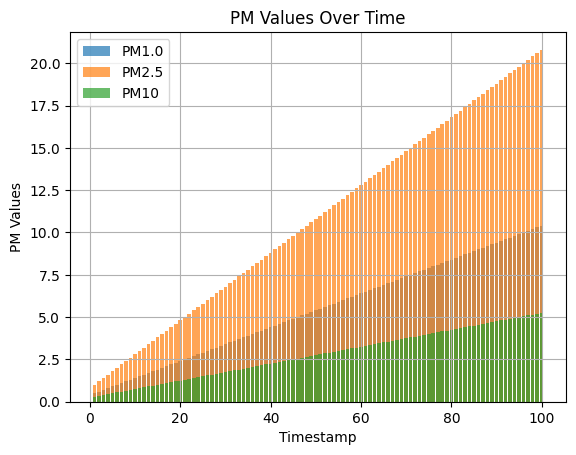

In [90]:
plt.bar(data1['t'], data1['p1'], label='PM1.0', alpha=0.7)
plt.bar(data1['t'], data1['p25'], label='PM2.5', alpha=0.7)
plt.bar(data1['t'], data1['p10'], label='PM10', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('PM Values')
plt.title('PM Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

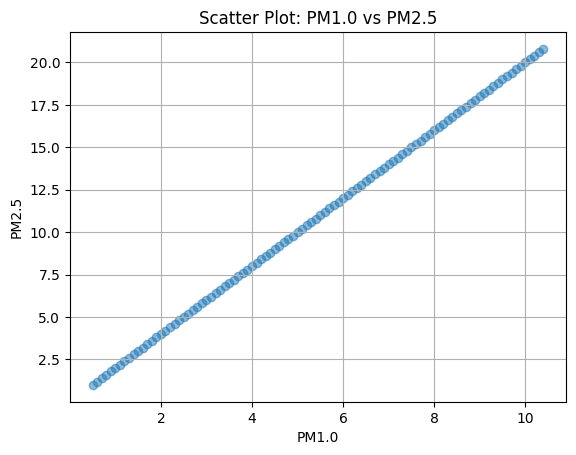

In [91]:
plt.scatter(data1['p1'], data1['p25'], alpha=0.5)
plt.xlabel('PM1.0')
plt.ylabel('PM2.5')
plt.title('Scatter Plot: PM1.0 vs PM2.5')
plt.grid(True)
plt.show()

In [92]:
data.corr()

,t,w,h,p1,p25,p10
t,1.000000,0.002831,0.021377,0.034002,0.034332,0.033630
w,0.002831,1.000000,-0.163680,-0.073577,-0.075933,-0.076656
h,0.021377,-0.163680,1.000000,0.068083,0.069483,0.070342
p1,0.034002,-0.073577,0.068083,1.000000,0.999831,0.999556
p25,0.034332,-0.075933,0.069483,0.999831,1.000000,0.999880
p10,0.033630,-0.076656,0.070342,0.999556,0.999880,1.000000


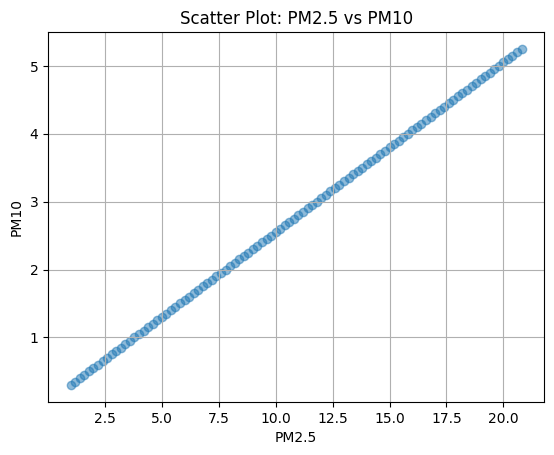

In [95]:
plt.scatter(data1['p25'], data1['p10'], alpha=0.5)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Scatter Plot: PM2.5 vs PM10')
plt.grid(True)
plt.show()